In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
 df = pd.read_csv(r"E:\Jupyter Notebook\Customer Churn Data.csv")

In [60]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [62]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

So there are no missing values here

But after seeing the excel sheet there are missing values in TotalCharges column....so we need to convert the column values to numeric values

In [63]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [64]:
df.TotalCharges.isnull().sum()

11

now we can see that there are 11 missing values here

In [65]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Replacing blanks with 0 as tenure is 0 and no total charges are recorded

In [66]:
df['TotalCharges'] = df['TotalCharges'].replace(" ","0")
df['TotalCharges'] = df['TotalCharges'].astype("float")

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [69]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Now we will check for duplicates in the dataset

In [70]:
df.duplicated().sum()

0

here we can see that there are no duplicates...but it is a good pracgtice to check duplicates with respect to a specific column which should have unique values

Now we will do so

In [71]:
df['customerID'].duplicated().sum()

0

so no duplicates here also

### Now we will convert 1 and 0 to yes and no for SeniorCitizen column

In [72]:
def conv(value):
    if value==1:
        return "Yes"
    else:
        return "No"

df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [73]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


#Now we will see how many cutomers have churned and how many are still there

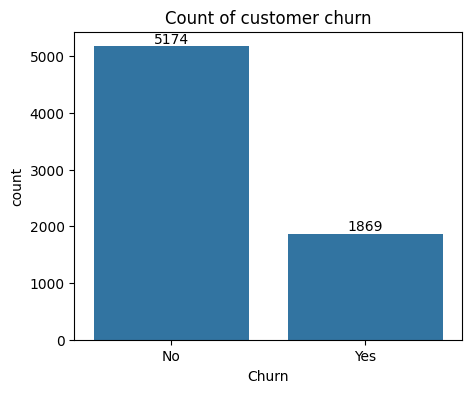

In [74]:
plt.figure(figsize = (5,4))
ax = sns.countplot(x = 'Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title('Count of customer churn')
plt.show()

In [75]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [76]:
x = df['Churn'].value_counts().index
y = df['Churn'].value_counts().values

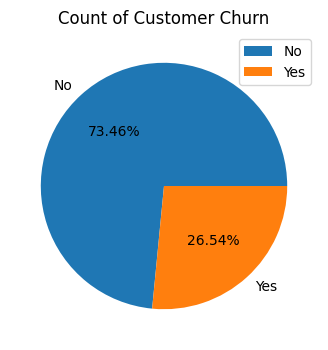

In [77]:
plt.figure(figsize = (5,4))
plt.pie(y, labels = x, autopct = "%0.2f%%")
plt.legend()
plt.title('Count of Customer Churn')
plt.show()

#Same can be done with different approach as following:

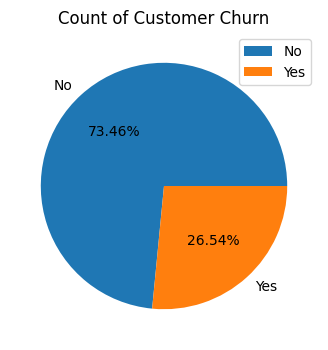

In [78]:
plt.figure(figsize = (4,4))
gb = df.groupby("Churn").agg({'Churn': "count"})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.legend()
plt.title('Count of Customer Churn')
plt.show()

#From the above pie chart we can conclude that 26.54% of our customers have churned out.
#Now let's explore the reason behind it

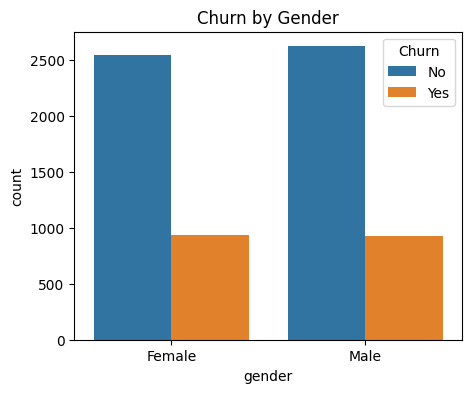

In [79]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'gender', data = df, hue = 'Churn')
plt.title('Churn by Gender')
plt.show()

### From above we can see that there is no significant dependency of 'Customers Churn' based on their 'Gender'

Now check for Senior Citizen

Text(0.5, 1.0, 'Count of Customers by Senior Citizen')

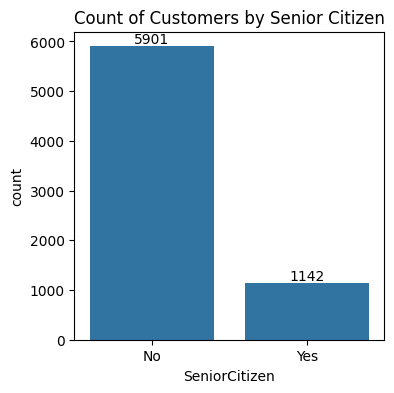

In [94]:
plt.figure(figsize = (4,4))
ax = sns.countplot(x = "SeniorCitizen", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Senior Citizen")

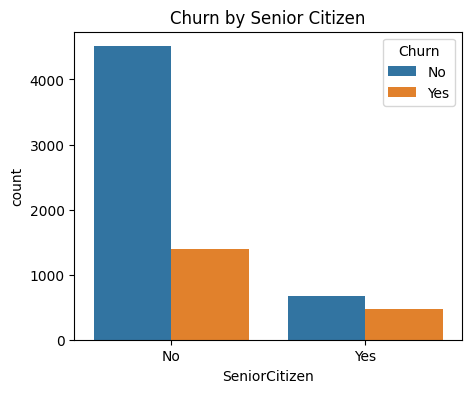

In [82]:
plt.figure(figsize = (5,4))
sns.countplot(x = 'SeniorCitizen', data = df, hue = 'Churn')
plt.title('Churn by Senior Citizen')
plt.show()

Now we will create a stacked bar chart...to clarify this more

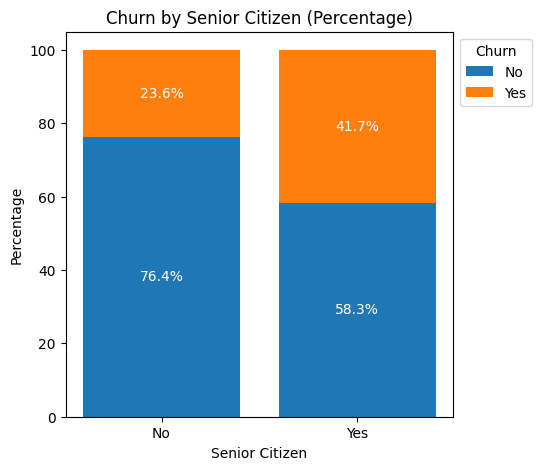

In [98]:
# Step 1: Calculate the percentage of Churn for each SeniorCitizen category
senior_churn = df.groupby(['SeniorCitizen', 'Churn']).size().unstack(fill_value=0)
senior_churn_percent = senior_churn.div(senior_churn.sum(axis=1), axis=0) * 100

# Step 2: Plot the stacked bar chart
fig, ax = plt.subplots(figsize=(5, 5))
bottom = np.zeros(len(senior_churn_percent))

for i, churn_status in enumerate(senior_churn_percent.columns):
    # Plot each bar segment
    ax.bar(senior_churn_percent.index, senior_churn_percent[churn_status], bottom=bottom, label=churn_status)
    # Add percentage labels
    for j, (index, value) in enumerate(senior_churn_percent[churn_status].items()):
        ax.text(index, bottom[j] + value / 2, f'{value:.1f}%', ha='center', va='center', color='white')
    bottom += senior_churn_percent[churn_status]

# Step 3: Customizing the plot
ax.set_title('Churn by Senior Citizen (Percentage)')
ax.set_xlabel('Senior Citizen')
ax.set_ylabel('Percentage')
ax.legend(title='Churn', bbox_to_anchor = (1.0, 1.0))
plt.show()

Now from above we can get an insight that comparitively a greater percentage of people in senior citizen category have churned

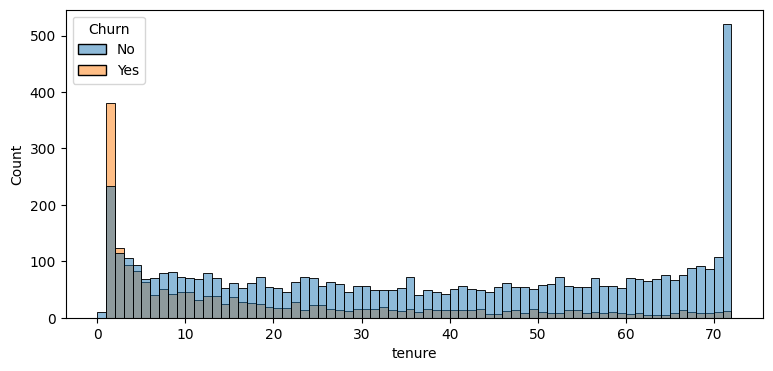

In [100]:
plt.figure(figsize = (9,4))
sns.histplot(x = "tenure", data = df, bins = 72, hue = "Churn")
plt.show()

 people who have used our services foe a long time have stayed and people who have used our services for 1 or 2 months have churned

Now based on contract:

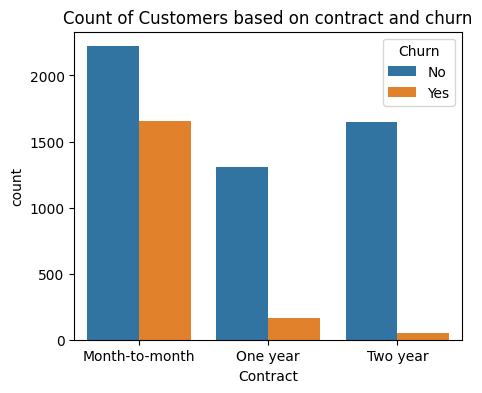

In [106]:
plt .figure(figsize = (5,4))
sns.countplot(x = 'Contract', data = df, hue = 'Churn')
plt.title('Count of Customers based on contract and churn')
plt.show()

People who have month to month contract are likely to churn then from those who have 1 or 2 years of contract

In [107]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

Now we will create countplot for each of these columns 

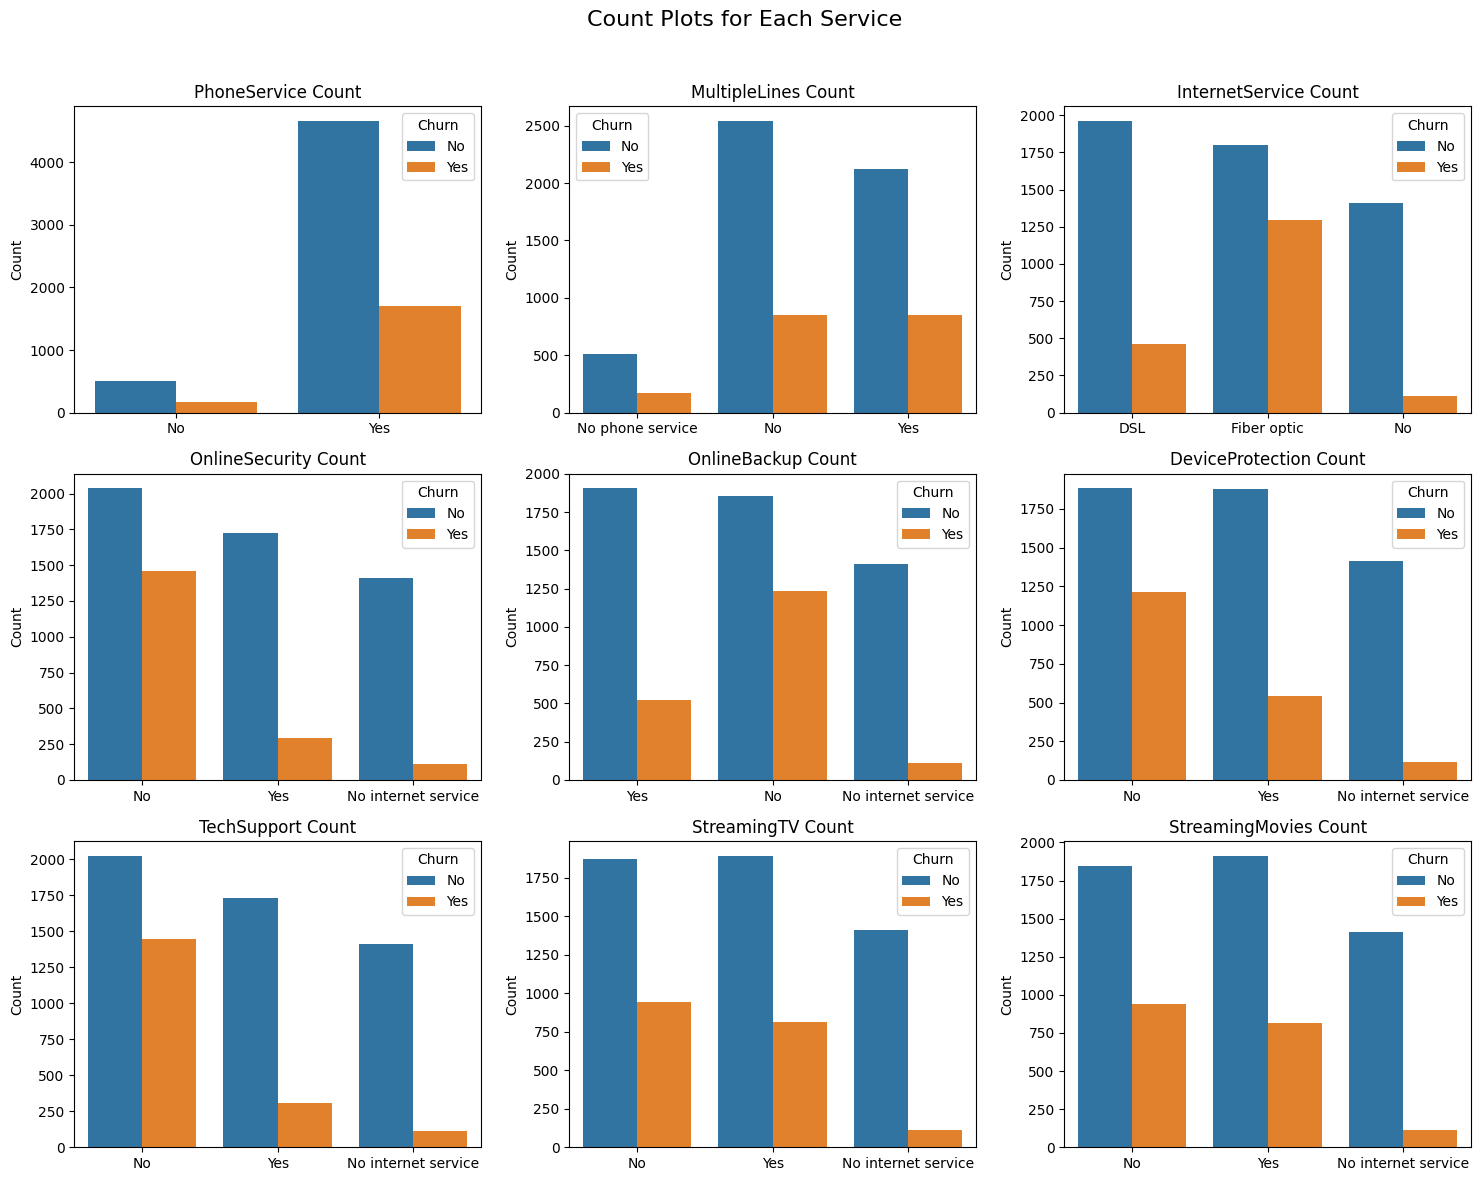

In [110]:
# List of columns to create count plots for
columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Set up the figure with subplots (3 rows x 3 columns layout to accommodate 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
fig.suptitle('Count Plots for Each Service', fontsize=16)

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column and create a countplot
for i, col in enumerate(columns):
    sns.countplot(x=col, data=df, ax=axes[i], hue = 'Churn')
    axes[i].set_title(f'{col} Count')
    axes[i].set_xlabel('')  # Remove x-axis labels for clarity
    axes[i].set_ylabel('Count')

# Remove any extra subplots
for j in range(len(columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout and show the plot
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the suptitle
plt.show()


The count plots show the distribution of churn (Yes/No) across various service types. Customers who use services like InternetService (especially fiber optic) and StreamingTV tend to have a higher churn rate. On the other hand, categories like PhoneService and DeviceProtection show lower churn rates, with a significant number of customers who do not churn. The plots indicate that customers with multiple services are generally more likely to churn, especially in services related to internet and streaming.

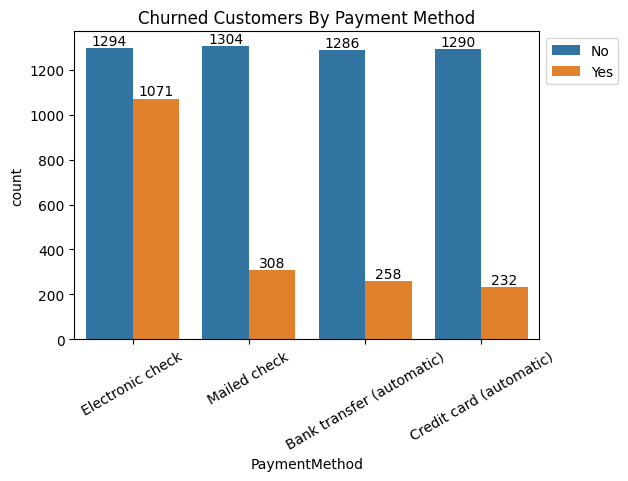

In [122]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaymentMethod', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers By Payment Method')
plt.xticks(rotation = 30)
plt.legend(bbox_to_anchor = (1.0, 1.0))
plt.show()

Customer is likely to churn when he is using electronic check as payment method.

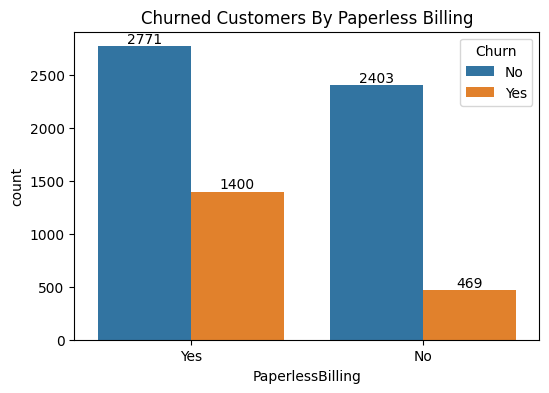

In [125]:
plt.figure(figsize = (6,4))
ax = sns.countplot(x = 'PaperlessBilling', data = df, hue = 'Churn')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title('Churned Customers By Paperless Billing')
plt.show()

From above we can say that customers are not satisfied with paperless billing...an significant amount of customers doing paperless billing have churned